In [1]:
import matplotlib.pyplot as plt
import nest
pop1 = nest.Create("iaf_psc_alpha", 10)
pop1.set({"I_e": 376.0})
pop2 = nest.Create("iaf_psc_alpha", 10)
multimeter = nest.Create("multimeter", 10)
multimeter.set({"record_from":["V_m"]})

nest.Connect(pop1, pop2, "one_to_one", syn_spec={"weight":20.0, "delay":1.0})
nest.Connect(multimeter, pop2, "one_to_one")

nest.Simulate(2000.0)
dmm = multimeter.get()
#print(multimeter.get())
Vms = dmm["events"][9]["V_m"]
ts = dmm["events"][9]["times"]

plt.figure(1)
plt.plot(ts, Vms)

plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.title("Мембранный потенциал одного нейрона")
plt.grid(True)
plt.show()
nest.ResetKernel()

ModuleNotFoundError: No module named 'nest'

In [3]:
import nest
import matplotlib
print(f"NEST version: {nest.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
#nest.synapse_models
print(nest.Models('nodes'))
print(nest.Models('synapses'))

NEST version: 3.8.0
Matplotlib version: 3.10.3
('ac_generator', 'aeif_cond_alpha', 'aeif_cond_alpha_astro', 'aeif_cond_alpha_multisynapse', 'aeif_cond_beta_multisynapse', 'aeif_cond_exp', 'aeif_psc_alpha', 'aeif_psc_delta', 'aeif_psc_delta_clopath', 'aeif_psc_exp', 'amat2_psc_exp', 'astrocyte_lr_1994', 'cm_default', 'correlation_detector', 'correlomatrix_detector', 'correlospinmatrix_detector', 'dc_generator', 'eprop_iaf_adapt_bsshslm_2020', 'eprop_iaf_bsshslm_2020', 'eprop_readout_bsshslm_2020', 'erfc_neuron', 'gamma_sup_generator', 'gauss_rate_ipn', 'gif_cond_exp', 'gif_cond_exp_multisynapse', 'gif_pop_psc_exp', 'gif_psc_exp', 'gif_psc_exp_multisynapse', 'ginzburg_neuron', 'glif_cond', 'glif_psc', 'glif_psc_double_alpha', 'hh_cond_beta_gap_traub', 'hh_cond_exp_traub', 'hh_psc_alpha', 'hh_psc_alpha_clopath', 'hh_psc_alpha_gap', 'ht_neuron', 'iaf_bw_2001', 'iaf_bw_2001_exact', 'iaf_chs_2007', 'iaf_chxk_2008', 'iaf_cond_alpha', 'iaf_cond_alpha_mc', 'iaf_cond_beta', 'iaf_cond_exp', 'iaf_

/usr/local/lib/python3.10/site-packages/nest/lib/hl_api_helper.py:114: UserWarning:
Models is deprecated and will be removed in a future version of NEST.
Please use nest.node_models or nest.synapse_models instead!


In [4]:
nest.GetDefaults('stdp_synapse')

{'alpha': 1.0,
 'delay': 1.0,
 'element_type': 'synapse',
 'has_delay': True,
 'Kplus': 0.0,
 'lambda': 0.01,
 'mu_minus': 1.0,
 'mu_plus': 1.0,
 'num_connections': 0,
 'receptor_type': 0,
 'requires_symmetric': False,
 'sizeof': 96,
 'synapse_model': 'stdp_synapse',
 'synapse_modelid': 47,
 'tau_plus': 20.0,
 'Wmax': 100.0,
 'weight': 1.0,
 'weight_recorder': NodeCollection(<empty>)}


May 17 21:36:25 NodeManager::prepare_nodes [Info]: 
    Preparing 47 nodes for simulation.

May 17 21:36:25 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

May 17 21:36:25 SimulationManager::run [Info]: 
    Simulation finished.


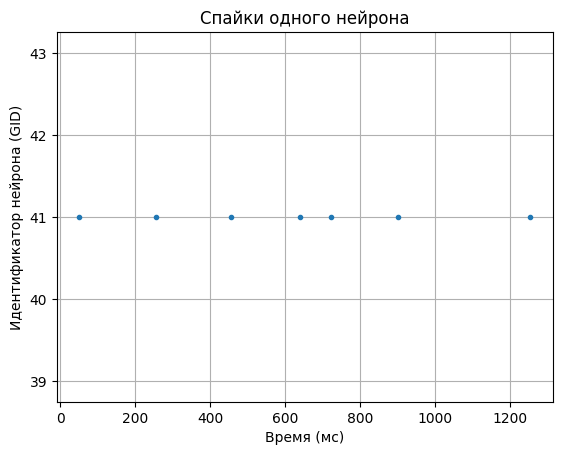

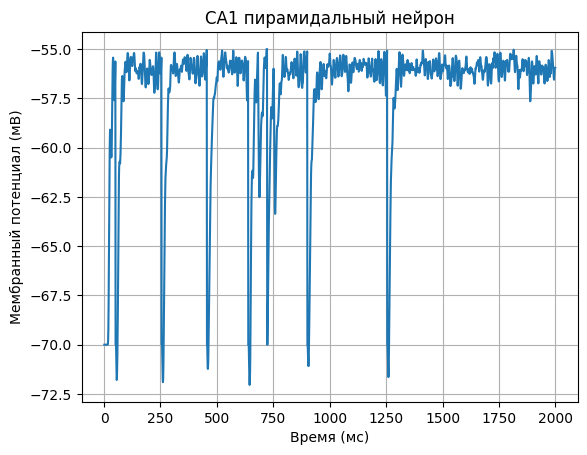

In [40]:
import nest
import matplotlib.pyplot as plt
nest.ResetKernel()

# Создаём несколько популяций CA3
n_populations = 3
n_neurons_per_pop = 10
ca3_pops = [nest.Create("iaf_psc_alpha", n_neurons_per_pop) for _ in range(n_populations)]

# Создаём популяцию тормозных интернейронов в CA1
n_ca1_interneurons = 10
ca1_interneurons = nest.Create("iaf_psc_alpha", n_ca1_interneurons)

# Создаём одну CA1 клетку (пирамидальный нейрон)
ca1_cell = nest.Create("iaf_psc_alpha", 1)

# Можно добавить стимуляторы или токи для генерации активности в CA3
for pop in ca3_pops:
    noise = nest.Create("poisson_generator", 1, {"rate": 10000.0})
    nest.Connect(noise, pop, syn_spec={"weight": 10.0})


# Интернейроны тоже получают возбуждение, часто от тех же источников, что и пирамидные клетки.
weight_ca3_to_interneuron = 30.0 # Вес синапсов от CA3 к интернейронам
delay_ca3_to_interneuron = 1.5 # Задержка от CA3 к интернейонам
for pop in ca3_pops:
    nest.Connect(pop, ca1_interneurons, syn_spec={"weight": weight_ca3_to_interneuron, "delay": delay_ca3_to_interneuron}, conn_spec={"rule": "all_to_all"})

synaptic_weight_ca1_inh_ca1_pyr = -50.0 # Вес тормозного синапса от интернейронов к пирамидальному нейрону (отрицательный!)
synaptic_delay_ca1_inh_ca1_pyr = 1.0 # Задержка тормозного синапса

# Соединяем все CA3 нейроны с CA1 нейроном через коллатерали Шаффера (обычно возбуждающие синапсы)
for pop in ca3_pops:
    nest.Connect(pop, ca1_cell, syn_spec={"weight": 30.0, "delay": 2.0})

# Соединяем тормозные интернейроны CA1 с пирамидальным нейроном CA1 (тормозные синапсы)
nest.Connect(ca1_interneurons, ca1_cell, syn_spec={"weight": synaptic_weight_ca1_inh_ca1_pyr, "delay": synaptic_delay_ca1_inh_ca1_pyr}, conn_spec={"rule": "all_to_all"})

# Подключаем мультиметр к CA1
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
nest.Connect(multimeter, ca1_cell)
spike_rec_ca1 = nest.Create("spike_recorder")
nest.Connect(ca1_cell, spike_rec_ca1)

spike_rec_ca3 = nest.Create("spike_recorder")
for pop in ca3_pops:
    nest.Connect(pop, spike_rec_ca3)

# Запускаем симуляцию
nest.Simulate(2000.0)

# Смотрим результат
events = spike_rec_ca1.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.xlabel("Время (мс)")
plt.ylabel("Идентификатор нейрона (GID)")
plt.title("Спайки одного нейрона")
plt.grid(True)

dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

plt.figure(1)
plt.plot(ts, Vms)

plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.title("CA1 пирамидальный нейрон")
plt.grid(True)
plt.show()



May 18 10:42:57 NodeManager::prepare_nodes [Info]: 
    Preparing 101 nodes for simulation.

May 18 10:42:57 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 101
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

May 18 10:42:57 SimulationManager::run [Info]: 
    Simulation finished.


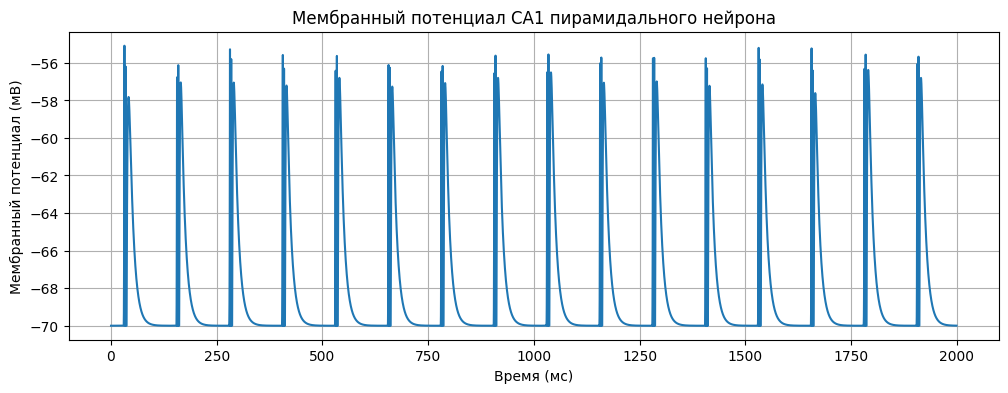

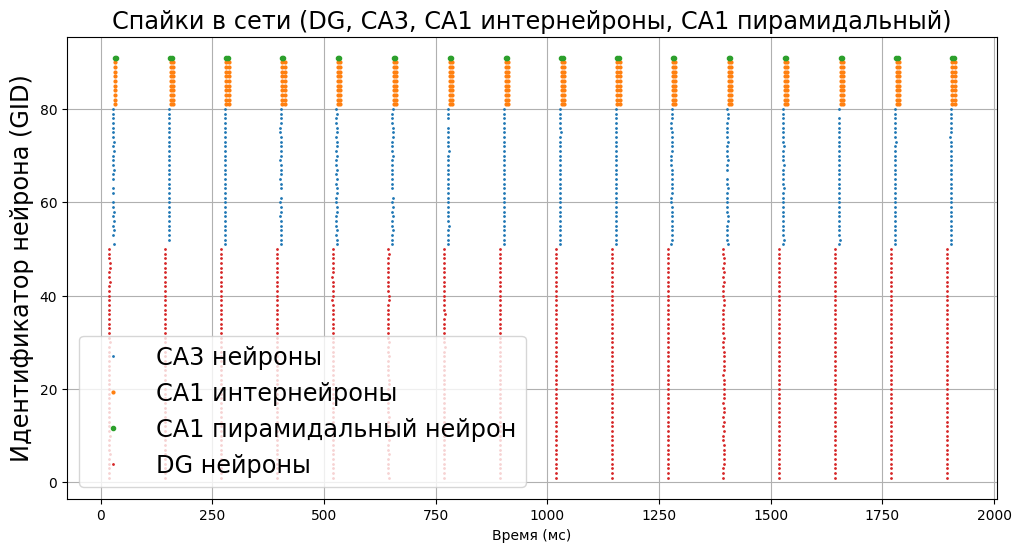

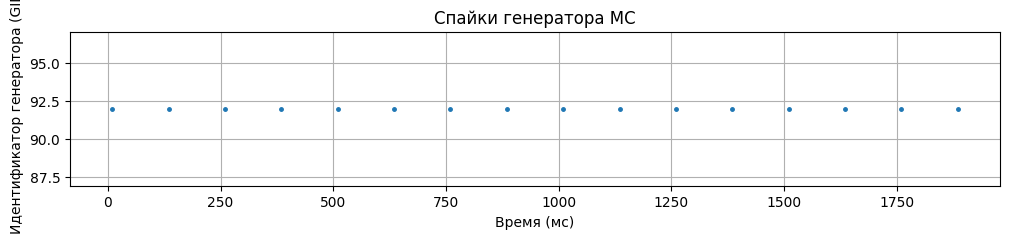

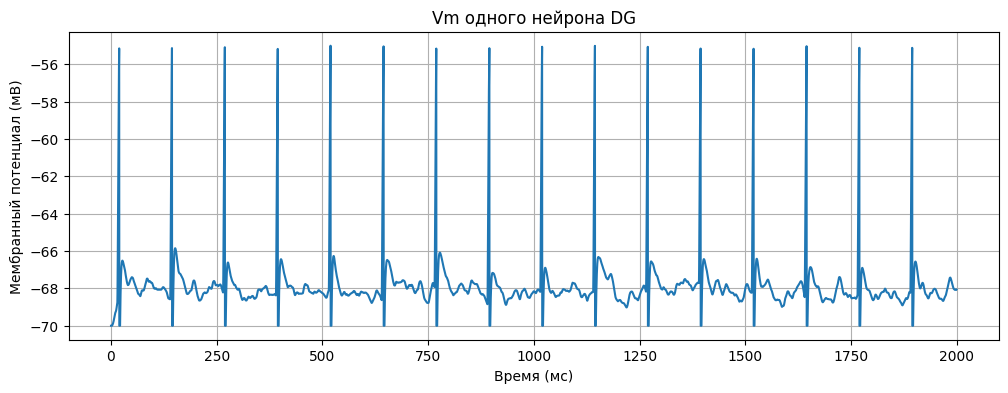

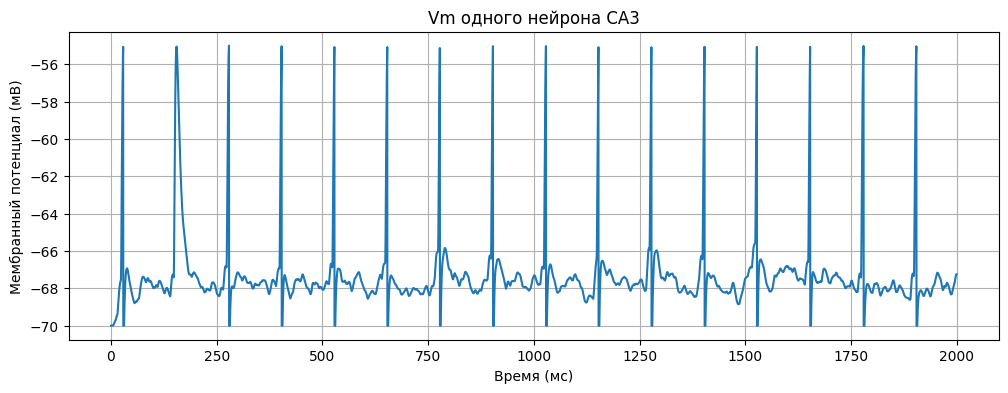

In [4]:
import nest
import matplotlib.pyplot as plt
import numpy as np

nest.ResetKernel()

# --- Параметры сети ---

n_dg_neurons = 50 # Количество гранулярных клеток в DG
ca3_total_neurons = 30 # Количество пирамидальных клеток в CA3
n_ca1_interneurons = 10 # Количество тормозных интернейронов в CA1

theta_frequency_hz = 8.0 # Частота тета-ритма в Гц
theta_period_ms = 1000.0 / theta_frequency_hz # Период тета-ритма в мс

ec_noise_rate = 1000.0 # Частота Пуассоновского генератора ЭК в Гц (на один генератор)

# -----Параметры для синапсов от генератора ЭК----

# ЭК -> DG (медиальный перфорантный путь) - возбуждающий
weight_ec_to_dg = 8.0 # Вес синапса от ЭК к DG
delay_ec_to_dg = 2.0 # Задержка от ЭК к DG

# ЭК -> CA3 (латеральный перфорантный путь) - возбуждающий
weight_ec_to_ca3 = 10.0 # Вес синапса от ЭК к CA3
delay_ec_to_ca3 = 3.0 # Задержка от ЭК к CA3

# -----Параметры для синапсов от МС генератора----
weight_ms_to_dg = 1170.0 # Вес синапсов от МС к DG (возбуждающий)
delay_ms_to_dg = 5.0 # Задержка от МС к DG

weight_ms_to_ca3 = 100.0 # Вес синапсов от МС к CA3 (возбуждающий)
delay_ms_to_ca3 = 5.0 # Задержка от МС к CA3

# ---Параметры для синапсов моховидных волокон (DG -> CA3)---
weight_dg_to_ca3_mossy = 200.0 # Вес моховидных волокон DG -> CA3 (очень сильный!)
delay_dg_to_ca3_mossy = 4.0 # Задержка моховидных волокон
indegree_dg_to_ca3 = 5 # Каждый нейрон CA3 получает 5 связей от случайных нейронов DG

# ---Параметры для синапсов CA3 -> CA1 пирамидальный---
synaptic_weight_ca3_ca1_pyr = 200.0 # Вес синапса от CA3 к пирамидальному нейрону CA1 (возбуждающий)
synaptic_delay_ca3_ca1_pyr = 2.0 # Задержка синапса от CA3 к пирамидальному нейрону CA1

# ---Параметры для синапсов CA3 -> CA1 интернейроны---
weight_ca3_to_interneuron = 100.0 # Вес синапсов от CA3 к интернейонам (возбуждающий)
delay_ca3_to_interneuron = 1.5 # Задержка от CA3 к интернейонам

# ---Параметры для синапсов CA1 интернейроны -> CA1 пирамидальный---
synaptic_weight_ca1_inh_ca1_pyr = -20.0 # Вес тормозного синапса от интернейронов к пирамидальному нейрону (отрицательный!)
synaptic_delay_ca1_inh_ca1_pyr = 1.0 # Задержка тормозного синапса
#На графике нет гиперполяризации, потому что текущая модель использует торможение, основанное на инъекции тока, которое физически не может опустить мембранный потенциал ниже потенциала покоя.

simulation_time_ms = 2000.0 # ---Время симуляции в мс---

# --- Создание узлов ---

# ----Клетки---
# Создаём популяцию гранулярных клеток зубчатой извилины (DG)
dg_population = nest.Create("iaf_psc_alpha", n_dg_neurons)

# Создаём популяцию CA3 (возбуждающие)
ca3_population = nest.Create("iaf_psc_alpha", ca3_total_neurons)

# Создаём популяцию тормозных интернейронов в CA1
ca1_interneurons = nest.Create("iaf_psc_alpha", n_ca1_interneurons)

# Создаём одну CA1 клетку (пирамидальный нейрон, возбуждающий)
ca1_cell = nest.Create("iaf_psc_alpha", 1)

# ---Генераторы---
# Создаём генератор тета-ритма (имитация входа от МС)
ms_theta_generator = nest.Create("spike_generator")
# Вычисляем времена спайков для тета-ритма на протяжении всей симуляции
spike_times_ms = np.arange(10.0, simulation_time_ms, theta_period_ms) # simulation_time_ms теперь определена
ms_theta_generator.set({"spike_times": spike_times_ms.tolist()}) # Устанавливаем времена спайков

# Создаём генератор шума от Энторинальной коры (ЭК)
ec_noise_generator = nest.Create("poisson_generator")
ec_noise_generator.set({"rate": ec_noise_rate}) # Устанавливаем частоту генератора

# ---Устройства записи---
# Мультиметр для CA1 пирамидального
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 0.1})
#  Мультиметры для проверки входящих токов в DG и CA3
multimeter_dg_check = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 0.1})
multimeter_ca3_check = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 0.1})


spike_rec_ca1 = nest.Create("spike_recorder") # Рекордер спайков для CA1 пирамидального
spike_rec_ca3 = nest.Create("spike_recorder") # Рекордер спайков для популяции CA3
spike_rec_ca1_interneurons = nest.Create("spike_recorder") # Рекордер спайков для интернейронов CA1
spike_rec_dg = nest.Create("spike_recorder") # Рекордер спайков для популяции DG
generator_recorder = nest.Create("spike_recorder")#  Рекордер для проверки генератора МС

# --- Соединения ---

# ---Генераторы---
# Соединяем генератор тета-ритма МС с популяцией DG (возбуждающие синапсы)
nest.Connect(ms_theta_generator, dg_population, syn_spec={"weight": weight_ms_to_dg, "delay": delay_ms_to_dg}, conn_spec={"rule": "all_to_all"})

# Соединяем генератор тета-ритма МС с популяцией CA3 (возбуждающие синапсы)
nest.Connect(ms_theta_generator, ca3_population, syn_spec={"weight": weight_ms_to_ca3, "delay": delay_ms_to_ca3}, conn_spec={"rule": "all_to_all"})

# Соединяем генератор шума ЭК с популяцией DG (возбуждающие синапсы)
# Используем rule "all_to_all", предполагая, что генератор имитирует множество входов
nest.Connect(ec_noise_generator, dg_population, syn_spec={"weight": weight_ec_to_dg, "delay": delay_ec_to_dg}, conn_spec={"rule": "all_to_all"})

# Соединяем генератор шума ЭК с популяцией CA3 (возбуждающие синапсы)
nest.Connect(ec_noise_generator, ca3_population, syn_spec={"weight": weight_ec_to_ca3, "delay": delay_ec_to_ca3}, conn_spec={"rule": "all_to_all"})

# ---Клетки---
# Соединяем популяцию DG с популяцией CA3 (моховидные волокна)
# Используем правило fixed_indegree на целевой популяции CA3
nest.Connect(dg_population, ca3_population, syn_spec={"weight": weight_dg_to_ca3_mossy, "delay": delay_dg_to_ca3_mossy}, conn_spec={"rule": "fixed_indegree", "indegree": indegree_dg_to_ca3})

# Соединяем популяцию CA3 с популяцией тормозных интернейронов CA1 (возбуждающие синапсы)
nest.Connect(ca3_population, ca1_interneurons, syn_spec={"weight": weight_ca3_to_interneuron, "delay": delay_ca3_to_interneuron}, conn_spec={"rule": "all_to_all"})

# Соединяем популяцию CA3 с CA1 нейроном (возбуждающие синапсы)
nest.Connect(ca3_population, ca1_cell, syn_spec={"weight": synaptic_weight_ca3_ca1_pyr, "delay": synaptic_delay_ca3_ca1_pyr}, conn_spec={"rule": "all_to_all"})

# Соединяем тормозные интернейроны CA1 с пирамидальным нейроном CA1 (тормозные синапсы)
nest.Connect(ca1_interneurons, ca1_cell, syn_spec={"weight": synaptic_weight_ca1_inh_ca1_pyr, "delay": synaptic_delay_ca1_inh_ca1_pyr}, conn_spec={"rule": "all_to_all"})

# ---Соединяем устройства записи---
nest.Connect(multimeter, ca1_cell) # Мультиметр к CA1 пирамидальному (вход)
nest.Connect(ca1_cell, spike_rec_ca1) # CA1 пирамидальный к рекордеру (выход)
nest.Connect(ca3_population, spike_rec_ca3) # Популяция CA3 к рекордеру спайков CA3
nest.Connect(ca1_interneurons, spike_rec_ca1_interneurons)# Интернейроны CA1 к их рекордеру спайков
nest.Connect(dg_population, spike_rec_dg) # Популяция DG к их рекордеру спайков
nest.Connect(ms_theta_generator, generator_recorder) # Соединяем генератор МС с рекордером для проверки

# Подключаем мультиметр к первому нейрону в популяции DG
nest.Connect(multimeter_dg_check, dg_population[0])
# Подключаем мультиметр к первому нейрону в популяции CA3
nest.Connect(multimeter_ca3_check, ca3_population[0])

# --- Запуск симуляции ---

nest.Simulate(simulation_time_ms)

# --- Получение и построение графиков ---

# Получаем данные с мультиметра CA1
dmm_events = multimeter.get("events") # Получаем весь словарь событий
Vms = dmm_events["V_m"] # Получаем список значений Vm по ключу "V_m"
ts_vm = dmm_events["times"] # Получаем список времен по ключу "times"

# Получаем данные со всех рекордеров
events_ca1_pyr = spike_rec_ca1.get("events") # Получаем словарь событий
senders_ca1_pyr = events_ca1_pyr["senders"]
ts_spikes_ca1_pyr = events_ca1_pyr["times"]

events_ca3 = spike_rec_ca3.get("events") # Получаем словарь событий
senders_ca3 = events_ca3["senders"]
ts_spikes_ca3 = events_ca3["times"]

events_ca1_interneurons = spike_rec_ca1_interneurons.get("events")
senders_ca1_interneurons = events_ca1_interneurons["senders"]
ts_spikes_ca1_interneurons = events_ca1_interneurons["times"]

events_dg = spike_rec_dg.get("events") # Получаем словарь событий
senders_dg = events_dg["senders"]
ts_spikes_dg = events_dg["times"]

# Получаем данные с рекордера генератора МС
gen_events = generator_recorder.get("events")
gen_senders = gen_events["senders"]
gen_times = gen_events["times"]

#  Получаем данные с мультиметров проверки
dmm_dg_events = multimeter_dg_check.get("events")
Vms_dg_check = dmm_dg_events["V_m"]
ts_vm_dg_check = dmm_dg_events["times"]

dmm_ca3_events = multimeter_ca3_check.get("events")
Vms_ca3_check = dmm_ca3_events["V_m"]
ts_vm_ca3_check = dmm_ca3_events["times"]

# График мембранного потенциала CA1 пирамидального
plt.figure(figsize=(12, 4))
plt.plot(ts_vm, Vms)
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.title("Мембранный потенциал CA1 пирамидального нейрона")
plt.grid(True)

# График спайков (Raster Plot) для всех нейронов
plt.figure(figsize=(12, 6))
plt.plot(ts_spikes_ca3, senders_ca3, ".", markersize=2, label="CA3 нейроны")
plt.plot(ts_spikes_ca1_interneurons, senders_ca1_interneurons, ".", markersize=4, label="CA1 интернейроны")
plt.plot(ts_spikes_ca1_pyr, senders_ca1_pyr, ".", markersize=6, label="CA1 пирамидальный нейрон")
plt.plot(ts_spikes_dg, senders_dg, ".", markersize=2, label="DG нейроны")
plt.xlabel("Время (мс)")
plt.ylabel("Идентификатор нейрона (GID)",fontsize='xx-large')
plt.title("Спайки в сети (DG, CA3, CA1 интернейроны, CA1 пирамидальный)",fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.grid(True)

# График спайков генератора МС
plt.figure(figsize=(12, 2))
plt.plot(gen_times, gen_senders, ".", markersize=5)
plt.xlabel("Время (мс)")
plt.ylabel("Идентификатор генератора (GID)")
plt.title("Спайки генератора МС")
plt.grid(True)

# График мембранного потенциала одного нейрона DG
plt.figure(figsize=(12, 4))
plt.plot(ts_vm_dg_check, Vms_dg_check)
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.title("Vm одного нейрона DG")
plt.grid(True)

# График мембранного потенциала одного нейрона CA3
plt.figure(figsize=(12, 4))
plt.plot(ts_vm_ca3_check, Vms_ca3_check)
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.title("Vm одного нейрона CA3")
plt.grid(True)

# Сброс ядра NEST
nest.ResetKernel()

In [65]:
import nest
import pprint # pprint красиво выводит словари

# Получаем параметры по умолчанию для модели stdp_synapse
default_stdp_params = nest.GetDefaults("stdp_synapse")

# Выводим их
print("Параметры по умолчанию для stdp_synapse:")
pprint.pprint(default_stdp_params) # Используем pprint для удобства чтения


Параметры по умолчанию для stdp_synapse:
{'Kplus': 0.0,
 'Wmax': 100.0,
 'alpha': 1.0,
 'delay': 1.0,
 'element_type': 'synapse',
 'has_delay': True,
 'lambda': 0.01,
 'mu_minus': 1.0,
 'mu_plus': 1.0,
 'num_connections': 0,
 'receptor_type': 0,
 'requires_symmetric': False,
 'sizeof': 96,
 'synapse_model': 'stdp_synapse',
 'synapse_modelid': 47,
 'tau_plus': 20.0,
 'weight': 1.0,
 'weight_recorder': NodeCollection(<empty>)}


Weights after simulation:
May 18 12:30:15 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
 ()

May 18 12:30:15 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.

May 18 12:30:15 NodeManager::prepare_nodes [Info]: 
    Preparing 57 nodes for simulation.

May 18 12:30:15 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 57
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

May 18 12:30:15 SimulationManager::run [Info]: 
    Simulation finished.


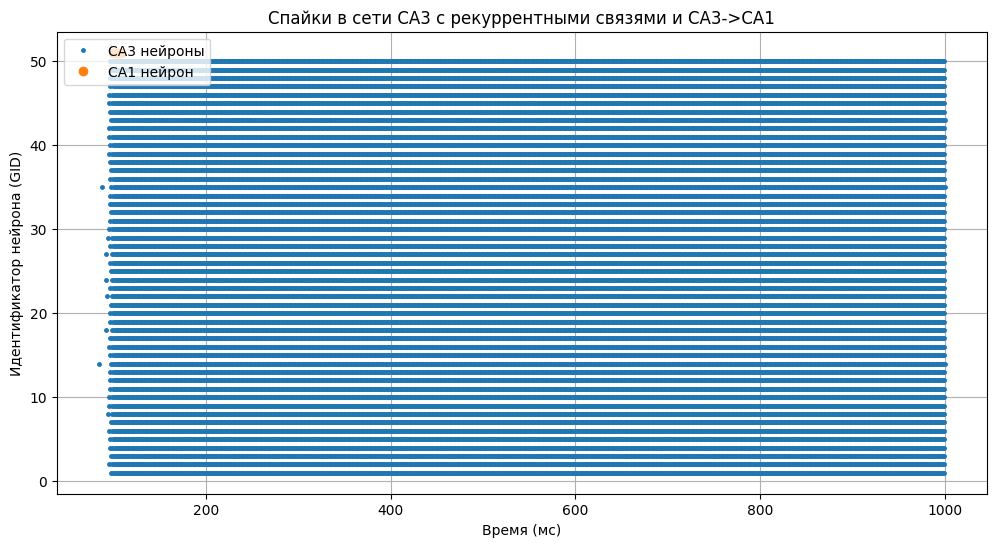

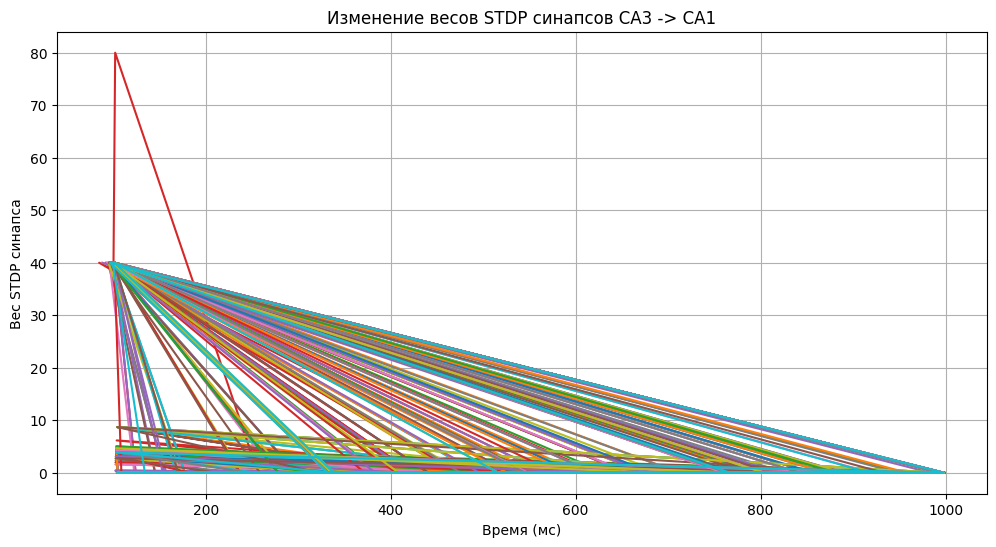

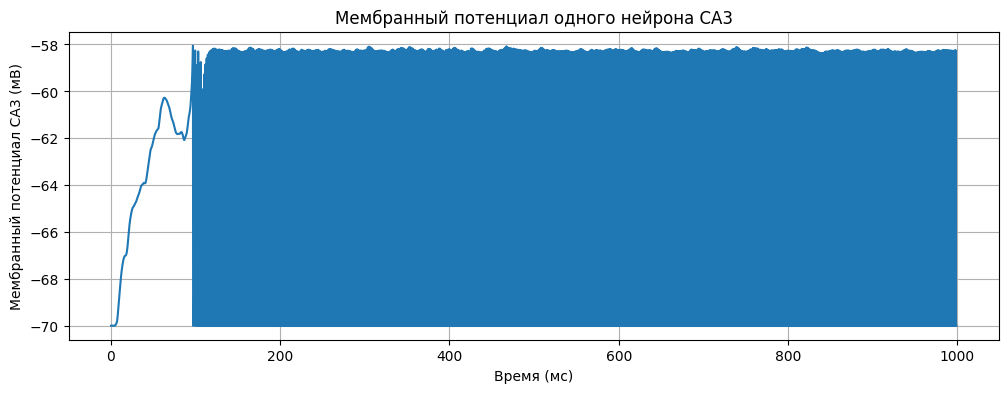

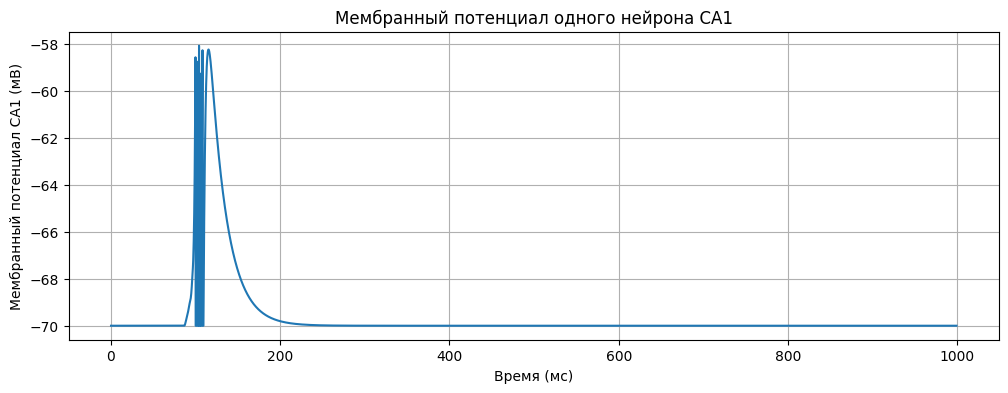

In [40]:
import nest
import matplotlib.pyplot as plt
import numpy as np

nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1})

#-------задаем параметры сети-------
n_ca3_neurons = 50
n_ca1_neurons = 1

neuron_params = {
    "V_m": -70.0, # Потенциал покоя
    "V_reset": -70.0, # Потенциал сброса
    "V_th": -58.0, # Порог срабатывания (немного выше, чем стандартные -50, может помочь увидеть Vm флуктуации)
    "tau_m": 20.0, # мс, постоянная времени мембраны
    "E_L": -70.0, # Потенциал утечки (равен потенциалу покоя)
    "t_ref": 1.0, # мс, рефрактерный период
}

recurrent_weight_ca3 = 50.0
recurrent_delay_ca3 = 1.0


lambda_stdp = 1.0 # Базовая скорость обучения
mu_plus_stdp = 0.6 # Сила LTP
mu_minus_stdp = 0.1 # Сила LTD
tau_plus_stdp = 20.0 # мс, постоянная времени окна STDP (для обоих сторон)
Wmax_stdp = 80.0 # Максимальный вес синапса STDP

initial_weight_stdp = (Wmax_stdp + 0.0) / 2.0
# Начальный вес STDP синапса (середина диапазона)
delay_stdp = 2.0 # Задержка STDP синапса CA3 -> CA1

# Параметры входного генератора (Пуассоновский шум на CA3)

# Используем один генератор и соединим его с каждым нейроном CA3 с фиксированной вероятностью.
noise_rate = 1000.0 # Частота Пуассоновского генератора
noise_weight = 20.0 # Вес синапса от генератора шума
noise_delay = 2.0 # Задержка от генератора шума


simulation_time_ms = 1000.0 # Время симуляции в мс

# --- Создание узлов ---
# Создаём популяцию нейронов CA3 (возбуждающие IAF)
ca3_population = nest.Create("iaf_psc_alpha", n_ca3_neurons, params=neuron_params)

# Создаём один пирамидальный нейрон CA1 (возбуждающий IAF)
ca1_neuron = nest.Create("iaf_psc_alpha", n_ca1_neurons, params=neuron_params)

# Создаём генератор входного шума (Пуассоновский)
noise_generator = nest.Create("poisson_generator", params={"rate": noise_rate})

spike_recorder_ca3 = nest.Create("spike_recorder") # Для CA3
spike_recorder_ca1 = nest.Create("spike_recorder") # Для CA1
# Создаём рекордер для записи веса STDP синапса
weight_recorder_stdp = nest.Create("weight_recorder")

# Добавляем мультиметр для диагностики одного нейрона CA3
multimeter_ca3 = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 0.1})

# Добавляем мультиметр для диагностики одного нейрона CA1
multimeter_ca1 = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 0.1})

nest.SetDefaults("stdp_synapse", {
    "lambda": lambda_stdp,     # Базовая скорость обучения
    "mu_plus": mu_plus_stdp,   # Сила LTP
    "mu_minus": mu_minus_stdp, # Сила LTD
    "tau_plus": tau_plus_stdp, # Постоянная времени окна STDP
    "Wmax": Wmax_stdp,      # Максимальный вес синапса
})

# Соединяем генератор шума с популяцией CA3 (правило: все-со-всеми)
nest.Connect(noise_generator, ca3_population, syn_spec={"weight": noise_weight, "delay": noise_delay}, conn_spec={"rule": "all_to_all"})

# Соединяем нейроны CA3 друг с другом (РЕКУРРЕНТНЫЕ СВЯЗИ, правило: все-со-всеми)
nest.Connect(ca3_population, ca3_population, syn_spec={"weight": recurrent_weight_ca3, "delay": recurrent_delay_ca3}, conn_spec={"rule": "all_to_all"})

# Создаем копию stdp_synapse с логированием веса
nest.CopyModel(
    "stdp_synapse",
    "logged_stdp_synapse",
    {"weight_recorder": weight_recorder_stdp[0]}
)

# Используем эту модель для соединения
syn_dict_stdp_connection = {
    "synapse_model": "logged_stdp_synapse",
    "weight": initial_weight_stdp,
    "delay": delay_stdp,
}

synapses_ca3_ca1_stdp = nest.Connect(ca3_population, ca1_neuron, syn_spec=syn_dict_stdp_connection)


nest.Connect(ca3_population, spike_recorder_ca3)
nest.Connect(ca1_neuron, spike_recorder_ca1)

conns = nest.GetConnections(source=ca3_population, target=ca1_neuron, synapse_model='stdp_synapse')
weights = conns.get('weight')
print("Weights after simulation:", weights)

stdp_synapses_to_record = nest.GetConnections(source=ca3_population, target=ca1_neuron, synapse_model='stdp_synapse')


# Подключаем мультиметр к одному нейрону CA3 для диагностики Vm
nest.Connect(multimeter_ca3, ca3_population[0]) # Подключаем к первому нейрону CA3
# Подключаем мультиметр к одному нейрону CA3 для диагностики Vm
nest.Connect(multimeter_ca1, ca1_neuron) # Подключаем к первому нейрону CA1

nest.Simulate(simulation_time_ms)

# --- Получение и построение графиков ---

# Получаем данные о спайках
events_ca3 = spike_recorder_ca3.get("events")
senders_ca3 = events_ca3["senders"]
ts_spikes_ca3 = events_ca3["times"]

events_ca1 = spike_recorder_ca1.get("events")
senders_ca1 = events_ca1["senders"]
ts_spikes_ca1 = events_ca1["times"]

# Получаем данные с мультиметра CA3
dmm_ca3_events = multimeter_ca3.get("events")
Vms_ca3 = dmm_ca3_events["V_m"]
ts_vm_ca3 = dmm_ca3_events["times"]
# Получаем данные с мультиметра CA3
dmm_ca1_events = multimeter_ca1.get("events")
Vms_ca1 = dmm_ca1_events["V_m"]
ts_vm_ca1 = dmm_ca1_events["times"]


# Получаем данные об изменении веса STDP синапсов
# Рекордер веса записывает время, идентификатор синапса и вес
weight_events = nest.GetStatus(weight_recorder_stdp)[0]["events"]
# weight_events = weight_recorder_stdp.get("events")[0] # Альтернативный синтаксис для NEST 3.x

# Получаем все STDP-синапсы
#stdp_connections = nest.GetConnections(source=ca3_population, target=ca1_neuron, synapse_model="stdp_synapse")
# Подключаем weight_recorder к этим синапсам
#nest.Connect(weight_recorder_stdp, stdp_connections)

recorded_weight_times = weight_events["times"]
recorded_synapse_ids = weight_events["senders"]
# В weight_recorder "senders" - это GID синапса
recorded_weights = weight_events["weights"]


# --- Построение графиков ---

# График спайков CA3 и CA1
plt.figure(figsize=(12, 6))
plt.plot(ts_spikes_ca3, senders_ca3, ".", markersize=5, label="CA3 нейроны")
plt.plot(ts_spikes_ca1, senders_ca1, ".", markersize=12, label="CA1 нейрон")
plt.xlabel("Время (мс)")
plt.ylabel("Идентификатор нейрона (GID)")
plt.title("Спайки в сети CA3 с рекуррентными связями и CA3->CA1")
plt.legend()
plt.grid(True)


# График изменения веса STDP синапсов CA3 -> CA1
plt.figure(figsize=(12, 6))
# Строим графики для каждого записанного синапса отдельно
# Сортируем по идентификатору синапса, чтобы рисовать линии для каждого синапса
sorted_indices = np.argsort(recorded_synapse_ids)
sorted_synapse_ids = recorded_synapse_ids[sorted_indices]
sorted_weight_times = recorded_weight_times[sorted_indices]
sorted_weights = recorded_weights[sorted_indices]

# Находим уникальные идентификаторы синапсов
unique_synapse_ids = np.unique(sorted_synapse_ids)

# Строим по одной линии для каждого синапса
for synapse_id in unique_synapse_ids:
    # Выбираем данные только для этого синапса
    synapse_indices = np.where(sorted_synapse_ids == synapse_id)[0]
    plt.plot(sorted_weight_times[synapse_indices], sorted_weights[synapse_indices], label=f'Синапс {synapse_id}')

plt.xlabel("Время (мс)")
plt.ylabel("Вес STDP синапса")
plt.title("Изменение весов STDP синапсов CA3 -> CA1")
# plt.legend() # Легенда может быть большой, если много синапсов
plt.grid(True)

# График мембранного потенциала одного нейрона CA3 (диагностика)
plt.figure(figsize=(12, 4))
plt.plot(ts_vm_ca3, Vms_ca3)
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал CA3 (мВ)")
plt.title("Мембранный потенциал одного нейрона CA3")
plt.grid(True)

# График мембранного потенциала одного нейрона CA1 (диагностика)
plt.figure(figsize=(12, 4))
plt.plot(ts_vm_ca1, Vms_ca1)
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал CA1 (мВ)")
plt.title("Мембранный потенциал одного нейрона CA1")
plt.grid(True)

# Сброс ядра NEST
nest.ResetKernel()


In [1]:
nest.GetDefaults("stdp_synapse")

NameError: name 'nest' is not defined

In [22]:
import nest
positions = nest.spatial.grid(shape=[10, 10],  # the number of rows and column in this grid ...
                              extent=[2., 2.]  # the size of the grid in mm
                              )
nest.Create('iaf_psc_alpha', positions=positions)


NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=100, first=201, last=300)